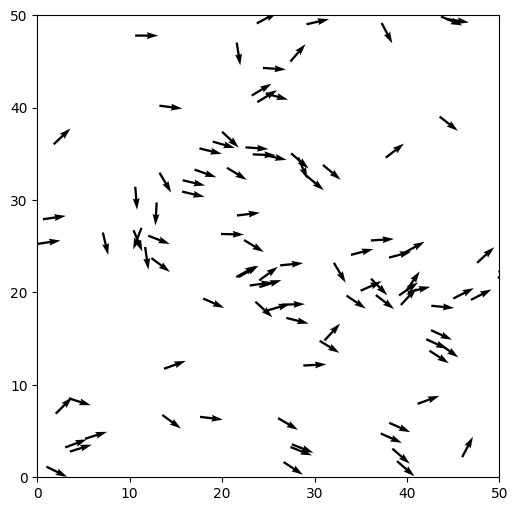

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from matplotlib.animation import FuncAnimation

# Define simulation parameters
n_agents = 100  # Number of locust agents
grid_size = 100  # Size of the simulation grid
time_steps = 1000  # Number of simulation time steps
neighborhood_size = 2  # Size of the locust's local neighborhood
marching_threshold = 0.7  # Threshold for determining if a locust will march
band_threshold = 0.5  # Threshold for determining if a locust will form a band

# Initialize locust agents with random positions and orientations
pos = np.random.rand(n_agents, 2) * grid_size
orient = np.random.rand(n_agents) * 2 * np.pi

# Create figure and axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlim([0, grid_size])
ax.set_ylim([0, grid_size])
ax.set_aspect('equal')

# Define the update function for the animation
def update(frame):
    # Compute distances between locusts
    dist = np.linalg.norm(pos[:, None, :] - pos[None, :, :], axis=-1)

    # Find neighbors of each locust
    neighbors = [np.where((dist[i, :] <= neighborhood_size) & (dist[i, :] > 0))[0] for i in range(n_agents)]

    # Compute the average orientation of each locust's neighbors
    avg_orient = np.zeros(n_agents)
    for i in range(n_agents):
        n = neighbors[i]
        if len(n) == 0:
            continue
        avg_orient[i] = np.mean(orient[n])

    # Update locust positions and orientations
    for i in range(n_agents):
        # Decide whether to march or form a band
        if np.random.rand() < marching_threshold:
            # Marching behavior
            orient[i] = avg_orient[i] + (np.random.rand() * np.pi / 2 - np.pi / 4)
        else:
            # Band formation behavior
            if np.random.rand() < band_threshold:
                # Form a band
                neighbors_i = neighbors[i]
                if len(neighbors_i) == 0:
                    continue
                dist_i = dist[i, neighbors_i]
                closest = np.argmin(dist_i)
                closest_locust = neighbors_i[closest]
                orient[i] = orient[closest_locust]

        # Update position
        pos[i, :] += [np.cos(orient[i]), np.sin(orient[i])]

        # Enforce periodic boundary conditions
        pos[i, :] = np.mod(pos[i, :] + grid_size, grid_size)

    # Clear axis and draw locust positions
    ax.clear()
    ax.set_xlim([0, grid_size])
    ax.set_ylim([0, grid_size])
    ax.set_aspect('equal')

    ax.quiver(pos[:, 0], pos[:, 1], np.cos(orient), np.sin(orient), scale=20, width=0.005)

# Create the animation
anim = FuncAnimation(fig, update, frames=range(time_steps))

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
anim.save('locusts.mp4', writer=writer)


In [ ]:
 ax.quiver(pos[:, 0], pos[:, 1], np.cos(orient), np.sin(orient),cmap=color, scale=20, width=0.005)

NameError: ignored

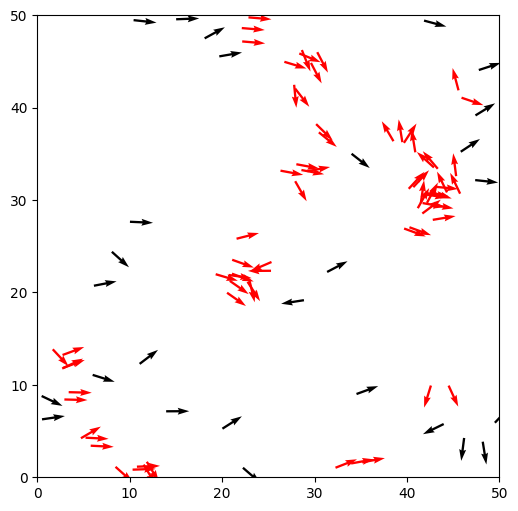

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Define simulation parameters
n_agents = 100 # Number of locust agents
grid_size = 200  # Size of the simulation grid
time_steps = 1000  # Number of simulation time steps
neighborhood_size = 2  # Size of the locust's local neighborhood
marching_threshold = 0.4  # Threshold for determining if a locust will march
band_threshold = 0.8  # Threshold for determining if a locust will form a band

# Initialize locust agents with random positions and orientations
pos = np.random.rand(n_agents, 2) * grid_size
orient = np.random.rand(n_agents) * 2 * np.pi

# Create figure and axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlim([0, grid_size])
ax.set_ylim([0, grid_size])
ax.set_aspect('equal')

# Define the update function for the animation
def update(frame):
    # Compute distances between locusts
    dist = np.linalg.norm(pos[:, None, :] - pos[None, :, :], axis=-1)

    # Find neighbors of each locust
    neighbors = [np.where((dist[i, :] <= neighborhood_size) & (dist[i, :] > 0))[0] for i in range(n_agents)]

    # Compute the average orientation of each locust's neighbors
    avg_orient = np.zeros(n_agents)
    for i in range(n_agents):
        n = neighbors[i]
        if len(n) == 0:
            continue
        avg_orient[i] = np.mean(orient[n])

    # Update locust positions and orientations
    for i in range(n_agents):
        # Decide whether to march or form a band
        if np.random.rand() < marching_threshold:
            # Marching behavior
            orient[i] = avg_orient[i] + (np.random.rand() * np.pi / 2 - np.pi / 4)
        else:
            # Band formation behavior
            if np.random.rand() < band_threshold:
                # Form a band
                neighbors_i = neighbors[i]
                if len(neighbors_i) == 0:
                    continue
                dist_i = dist[i, neighbors_i]
                closest = np.argmin(dist_i)
                closest_locust = neighbors_i[closest]
                orient[i] = orient[closest_locust]

        # Update position
        pos[i, :] += [np.cos(orient[i]), np.sin(orient[i])]

        # Enforce periodic boundary conditions
        pos[i, :] = np.mod(pos[i, :] + grid_size, grid_size)

    # Update the color of each locust based on its movement state
    color = np.where(avg_orient == 0, 'black', np.where(np.abs(avg_orient - orient) < np.pi / 2, 'red', 'blue'))

    # Clear axis and draw locust positions
    ax.clear()
    ax.set_xlim([0, grid_size])
    ax.set_ylim([0, grid_size])
    ax.set_aspect('equal')

    #ax.scatter(pos[:, 0], pos[:, 1], s=5, c=color)
    ax.quiver(pos[:, 0], pos[:, 1], np.cos(orient), np.sin(orient),color=color, scale=20, width=0.005)

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=range(time_steps))

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
anim.save('locusts.mp4', writer=writer)


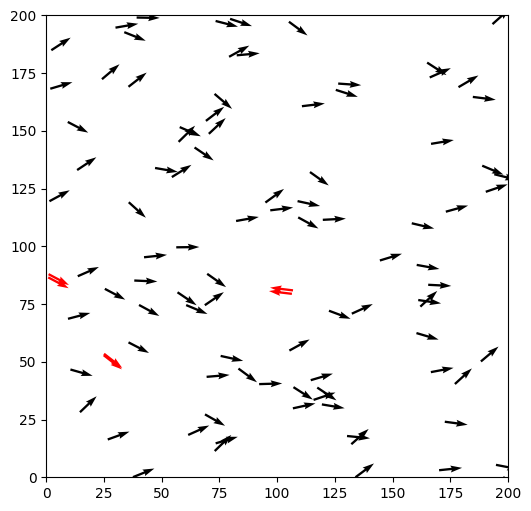

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Define simulation parameters
n_agents = 100 # Number of locust agents
grid_size = 200  # Size of the simulation grid
time_steps = 1000  # Number of simulation time steps
neighborhood_size = 2  # Size of the locust's local neighborhood
marching_threshold = 0.4  # Threshold for determining if a locust will march
band_threshold = 0.8  # Threshold for determining if a locust will form a band

# Initialize locust agents with random positions and orientations
pos = np.random.rand(n_agents, 2) * grid_size
orient = np.random.rand(n_agents) * 2 * np.pi

# Create figure and axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xlim([0, grid_size])
ax.set_ylim([0, grid_size])
ax.set_aspect('equal')

cc = np.zeros(time_steps)



# Define the update function for the animation
def update(frame):
    # Compute distances between locusts
    dist = np.linalg.norm(pos[:, None, :] - pos[None, :, :], axis=-1)

    # Find neighbors of each locust
    neighbors = [np.where((dist[i, :] <= neighborhood_size) & (dist[i, :] > 0))[0] for i in range(n_agents)]


    # Compute the clustering coefficient for each locust
    for i in range(n_agents):
        n = neighbors[i]
        k = len(n)
        if k < 2:
            continue
        e = 0
        for j in range(k-1):
            for l in range(j+1, k):
                if n[j] in neighbors[n[l]]:
                    e += 1
        cc[frame] += 2 * e / (k * (k - 1))








    # Compute the average orientation of each locust's neighbors
    avg_orient = np.zeros(n_agents)
    for i in range(n_agents):
        n = neighbors[i]
        if len(n) == 0:
            continue
        avg_orient[i] = np.mean(orient[n])

    # Update locust positions and orientations
    for i in range(n_agents):
        # Decide whether to march or form a band
        if np.random.rand() < marching_threshold:
            # Marching behavior
            orient[i] = avg_orient[i] + (np.random.rand() * np.pi / 2 - np.pi / 4)
        else:
            # Band formation behavior
            if np.random.rand() < band_threshold:
                # Form a band
                neighbors_i = neighbors[i]
                if len(neighbors_i) == 0:
                    continue
                # Find the neighbor directly in front of the locust
                angles = np.arctan2(pos[neighbors_i, 1] - pos[i, 1], pos[neighbors_i, 0] - pos[i, 0]) - orient[i]
                angles = np.mod(angles + np.pi, 2 * np.pi) - np.pi
                front_neighbor = neighbors_i[np.argmin(np.abs(angles))]
                orient[i] = orient[front_neighbor]

        # Update position
        pos[i, :] += [np.cos(orient[i]), np.sin(orient[i])]

        # Enforce periodic boundary conditions
        pos[i, :] = np.mod(pos[i, :] + grid_size, grid_size)

    # Update the color of each locust based on its movement state
    color = np.where(avg_orient == 0, 'black', np.where(np.abs(avg_orient - orient) < np.pi / 2, 'red', 'blue'))

    # Clear axis and draw locust positions
    ax.clear()
    ax.set_xlim([0, grid_size])
    ax.set_ylim([0, grid_size])
    ax.set_aspect('equal')

    #ax.scatter(pos[:, 0], pos[:, 1], s=5, c=color)
    ax.quiver(pos[:, 0], pos[:, 1], np.cos(orient), np.sin(orient),color=color, scale=20, width=0.005)

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=range(time_steps))

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)
anim.save('locustsfollow.mp4', writer=writer)


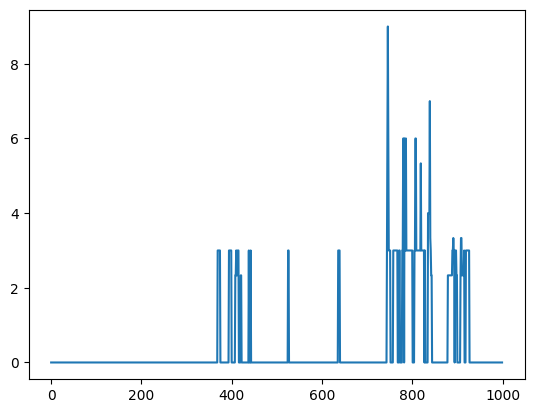

In [ ]:
plt.plot(cc)